<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
## Write your code here
# Identify duplicates based on specific columns
duplicate_subset = df[df.duplicated(subset=["MainBranch", "Employment", "RemoteWork"])]

# Display the first few rows of the duplicates based on the subset
print(duplicate_subset.head())

    ResponseId                      MainBranch                 Age  \
1            2  I am a developer by profession     35-44 years old   
2            3  I am a developer by profession     45-54 years old   
14          15  I am a developer by profession     25-34 years old   
15          16  I am a developer by profession     45-54 years old   
16          17     I code primarily as a hobby  Under 18 years old   

             Employment                            RemoteWork   Check  \
1   Employed, full-time                                Remote  Apples   
2   Employed, full-time                                Remote  Apples   
14  Employed, full-time  Hybrid (some remote, some in-person)  Apples   
15  Employed, full-time  Hybrid (some remote, some in-person)  Apples   
16   Student, full-time                                   NaN  Apples   

                                     CodingActivities  \
1   Hobby;Contribute to open-source projects;Other...   
2   Hobby;Contribute to op

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [7]:
## Write your code here
# Analyze duplicate distribution by counting unique combinations of subset columns
duplicate_counts = df[["MainBranch", "Employment", "RemoteWork"]].duplicated().value_counts()
print(duplicate_counts)

True     64896
False      561
Name: count, dtype: int64


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


In [8]:
## Write your code here
# Visualize the distribution of duplicates by Country
duplicate_by_country = df[df.duplicated(subset=["Country"])]
duplicate_by_country_count = duplicate_by_country["Country"].value_counts()

### Bar Chart

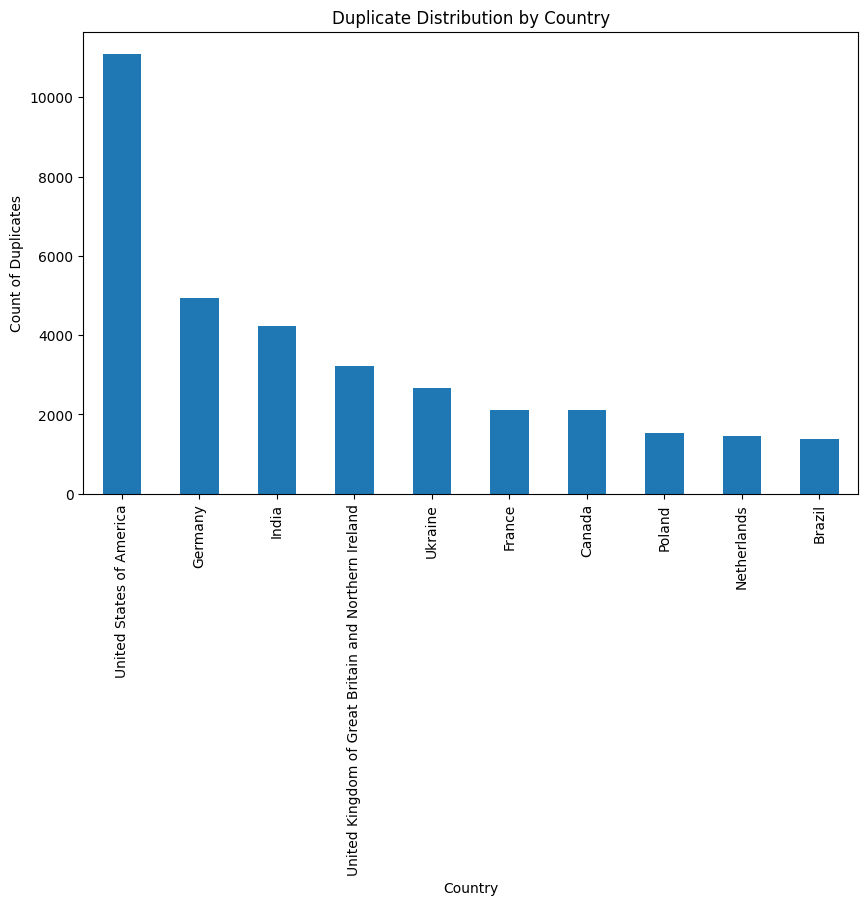

In [9]:
# Plot a bar chart
plt.figure(figsize=(10,6))
# duplicate_by_country_count.plot(kind='bar')
duplicate_by_country_count.head(10).plot(kind='bar')
plt.title("Duplicate Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Count of Duplicates")
plt.show()

In [10]:
# Visualize the distribution of duplicates by Employment
duplicate_by_employment = df[df.duplicated(subset=["Employment"])]
duplicate_by_employment_count = duplicate_by_employment["Employment"].value_counts()

### Pie Chart

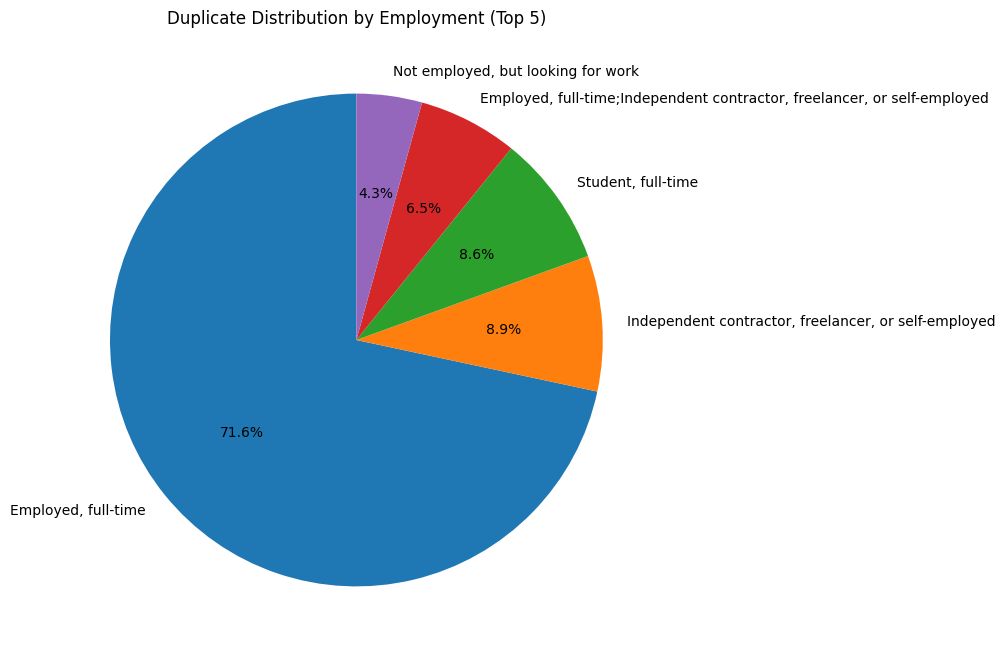

In [11]:
# Plot a pie chart
# Step 1: Filter duplicates by the 'Employment' column
duplicate_by_employment = df[df.duplicated(subset=["Employment"])]

# Step 2: Count the occurrences of duplicates by 'Employment'
duplicate_by_employment_count = duplicate_by_employment["Employment"].value_counts()

# Step 3: Plot the pie chart for the top 5 'Employment' categories with duplicates
plt.figure(figsize=(8,8))
duplicate_by_employment_count.head(5).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Duplicate Distribution by Employment (Top 5)")
plt.ylabel("")  # No need for a y-axis label
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [12]:
## Write your code here
# Remove duplicates based on the subset of columns: MainBranch, Employment, and RemoteWork
df_cleaned = df.drop_duplicates(subset=["MainBranch", "Employment", "RemoteWork"])

# Display the cleaned dataset
print(df_cleaned.head())


   ResponseId                                         MainBranch  \
0           1                     I am a developer by profession   
3           4                              I am learning to code   
4           5                     I am a developer by profession   
5           6                        I code primarily as a hobby   
6           7  I am not primarily a developer, but I write co...   

                  Age           Employment RemoteWork   Check  \
0  Under 18 years old  Employed, full-time     Remote  Apples   
3     18-24 years old   Student, full-time        NaN  Apples   
4     18-24 years old   Student, full-time        NaN  Apples   
5  Under 18 years old   Student, full-time        NaN  Apples   
6     35-44 years old  Employed, full-time     Remote  Apples   

               CodingActivities  \
0                         Hobby   
3                           NaN   
4                           NaN   
5                           NaN   
6  I don’t code outside o

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.



### Explanation of the Process:

#### 1. Identifying Duplicates:
Duplicates were identified using `df.duplicated()`, which checks for complete row duplication or duplicates based on specific subsets of columns like `MainBranch`, `Employment`, and `RemoteWork`.

#### 2. Analyzing Characteristics of Duplicates:
The analysis showed that certain columns like `MainBranch`, `Employment`, and `RemoteWork` contained frequent duplicate values. These were examined to understand the patterns and which fields were most commonly duplicated.

#### 3. Visualizing Duplicates:
Visualizations like bar charts for `Country` and pie charts for `Employment` helped to understand the distribution of duplicates across different categories.

#### 4. Strategic Removal:
Duplicates were removed based on specific columns (i.e., `MainBranch`, `Employment`, `RemoteWork`) to maintain the uniqueness of the dataset. This allowed for cleaner data, which is important for further analysis.

2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Reasoning for Column Selection:

The columns selected for identifying duplicates (`MainBranch`, `Employment`, `RemoteWork`) were chosen because they are key attributes that define the uniqueness of a survey respondent. Duplicates in these fields likely represent repeated responses from the same individual or group, which would distort any analysis based on these variables.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


## Author

<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Willie Conway

Copyright © IBM Corporation. All rights reserved.
